# Part I - Exploratory Analysis - Airline dataset

## Introduction

This Dataset is a subset of the Flights dataset called 'airline_2m.csv' [here](https://learn.udacity.com/nanodegrees/nd002/parts/cd12532/lessons/2c81b194-e6ad-4a7e-bafe-51fa984a175f/concepts/7460cf6b-934b-41ad-9633-9cc1848a1d9c?lesson_tab=lesson), it is taken from Bureau of Transportation Statistics. The dataset was massive so I needed to drop some data. I dropped data for years below 2004 because they did not have information on departure delay causes, and I also dropped year 2020 data because it only had half as many rows as other years. Then I dropped flights that were cancelled or diverted because I'm only interested in delayed flights and thier reasons. Finally, I dropped all columns that only provided information about cancelled or diverted flights because these were not necessary. This leaves just over 1 million rows for the dataset.

### Dataset Variables
The variables in this dataset have not been changed and a detailed description of each variable can be found [here](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

**Note**: All times are in hhmm format instead of hh:mm, so 1607 means 16:07.
- **Date columns**: These are `Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek` and `FlightDate`.
- **Airline and Airplane**: Information regarding these can be found in the columns `IATA_CODE_Reporting_Airline`, `Tail_Number`, `Flight_Number_Reporting_Airline`.
- **Departure**: `Origin`, `OriginCityName`, `OriginState` give airport information. `CRSDepTime`, `DepTime`, `DepDelay`, `DepDelayMinutes`, `DepDel15`, `DepTimeBlk` give departure time information in minutes, with `CRSDepTime` being planned departure time and `DepTime` being actual departure time.`TaxiOut` is the duration between gate out time and take off (`WheelsOff`) time. `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay` are the delay reasons. If `DepDelay` is less than 15 then delay reasons times are set to 0.
- **Arrival**: Analogous to departure columns but there are *no delay reasons columns* (like `CarrierDelay`) for arrival delays.
- **Airborne**: `CRSElapsedTime`, `ActualElapsedTime`, `AirTime`, `Distance` and `DistanceGroup` columns provide this information, with CRS meaing planned elapsed time.

## Preliminary wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv('data/airline_subset.csv')
df.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,...,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2009,2,5,28,4,2009-05-28,FL,N946AT,671,MKE,...,157.0,159.0,141.0,1066.0,5,0.0,0.0,0.0,0.0,0.0
1,2013,2,6,29,6,2013-06-29,MQ,N665MQ,3297,GJT,...,135.0,118.0,103.0,773.0,4,0.0,0.0,0.0,0.0,0.0
2,2010,3,8,31,2,2010-08-31,DL,N6705Y,1806,LAX,...,270.0,250.0,220.0,1979.0,8,0.0,0.0,0.0,0.0,0.0
3,2006,1,1,15,7,2006-01-15,US,N504AU,465,EWR,...,126.0,107.0,80.0,529.0,3,0.0,0.0,0.0,0.0,32.0
4,2006,3,8,7,1,2006-08-07,CO,N27724,1431,BOS,...,125.0,131.0,94.0,563.0,3,0.0,0.0,0.0,0.0,0.0


In [11]:
df_sample = df.sample(100, random_state=1)
df_sample.to_csv('data/sample_flights_data.csv', index=False)

In [3]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'Origin', 'OriginCityName',
       'OriginState', 'Dest', 'DestCityName', 'DestState', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk',
       'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
# note times are in hhmm format instead of hh:mm
df[['FlightDate', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
    'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance',
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].describe().astype(int)

,CRSDepTime,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403,1058403
mean,1328,1335,9,16,1358,1474,7,1494,1480,6,134,130,107,768,3,0,3,0,4
std,472,485,36,10,487,509,7,492,512,39,72,72,69,587,21,9,15,0,20
min,1,1,-82,0,1,1,0,1,1,-94,1,-148,-178,27,0,0,0,0,0
25%,925,927,-5,10,941,1100,4,1114,1104,-12,81,78,57,337,0,0,0,0,0
50%,1320,1328,-1,14,1341,1509,6,1519,1513,-3,115,112,88,602,0,0,0,0,0
75%,1725,1735,7,19,1749,1907,8,1912,1913,10,165,161,137,999,0,0,0,0,0
max,2359,2400,1878,1398,2400,2400,1439,2400,2400,1898,705,713,686,5095,1878,1847,1343,219,1256


In [5]:
# We can see from above that some rows have negative `AirTime` and `ActualElapsedTime`. here are the rows in more detail
df[(df['AirTime']<10)&(df['OriginState']!=df['DestState'])][['AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'WheelsOff', 'WheelsOn',
                                'DepTime', 'ArrTime', 'Origin', 'OriginCityName', 'Dest', 'DestCityName']].sample(10)

,AirTime,CRSElapsedTime,ActualElapsedTime,WheelsOff,WheelsOn,DepTime,ArrTime,Origin,OriginCityName,Dest,DestCityName
606555,-60.0,85.0,75.0,45.0,2345.0,2235.0,2350.0,SLC,"Salt Lake City, UT",HLN,"Helena, MT"
147285,7.0,60.0,54.0,2113.0,2120.0,2059.0,2153.0,DFW,"Dallas/Fort Worth, TX",FSM,"Fort Smith, AR"
829364,-46.0,115.0,105.0,2333.0,2147.0,2325.0,10.0,CVG,"Cincinnati, OH",MSP,"Minneapolis, MN"
533890,8.0,80.0,55.0,2242.0,2250.0,2200.0,2255.0,CLT,"Charlotte, NC",ATL,"Atlanta, GA"
223597,-15.0,61.0,71.0,2000.0,1945.0,1940.0,2051.0,CVG,"Cincinnati, OH",CAK,"Akron, OH"
401233,-63.0,121.0,113.0,1720.0,1617.0,1710.0,1903.0,HPN,"White Plains, NY",CVG,"Cincinnati, OH"
396741,6.0,122.0,50.0,1905.0,1911.0,1850.0,1940.0,CLE,"Cleveland, OH",JFK,"New York, NY"
561766,7.0,46.0,20.0,1010.0,1017.0,1000.0,1020.0,DAY,"Dayton, OH",CVG,"Cincinnati, OH"
91508,3.0,85.0,91.0,849.0,852.0,728.0,859.0,SFO,"San Francisco, CA",LAS,"Las Vegas, NV"
38251,-11.0,82.0,65.0,1438.0,1427.0,1425.0,1530.0,ATL,"Atlanta, GA",SDF,"Louisville, KY"


In [6]:
# catching indexes with wrong airtime
airtime_errors_index = []
for i in df[df['AirTime']<10].index:
    if (df.loc[i, 'AirTime']<9) | (df.loc[i,'ActualElapsedTime']/df.loc[i,'CRSElapsedTime']<=0.9):
        airtime_errors_index.append(i)

# removing rows with wrong airtime and resetting index
df = df[~df.index.isin(airtime_errors_index)].reset_index(drop=True)

In [7]:
# delays are observed times subtracted from planned CRS times
df[['CRSDepTime', 'DepTime', 'DepDelay', 'CRSArrTime', 'ArrTime', 'ArrDelay']].head(5)

,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay
0,1204,1202.0,-2.0,1541,1541.0,0.0
1,1630,1644.0,14.0,1945,1942.0,-3.0
2,1305,1305.0,0.0,2035,2015.0,-20.0
3,1820,1911.0,51.0,2026,2058.0,32.0
4,1755,1751.0,-4.0,2000,2002.0,2.0


In [8]:
# no null values
assert df.isnull().sum().sum() == 0

In [9]:
df.nunique()

Year                                  16
Quarter                                4
Month                                 12
DayofMonth                            31
DayOfWeek                              7
FlightDate                          5844
IATA_CODE_Reporting_Airline           28
Tail_Number                        11181
Flight_Number_Reporting_Airline     7892
Origin                               392
OriginCityName                       382
OriginState                           53
Dest                                 392
DestCityName                         382
DestState                             53
CRSDepTime                          1355
DepTime                             1425
DepDelay                             863
DepDelayMinutes                      814
DepDel15                               2
DepTimeBlk                            19
TaxiOut                              222
WheelsOff                           1432
WheelsOn                            1440
TaxiIn          

### Structure of the dataset

The data is not tidy and has some potential issues such as times stored in hhmm format instead of hh:mm, but fortunately it comes with supplimentary columns such as `DepTimeBlk` which group the times into hour long intervals.

### Potential investigations using the dataset variables

The wide range of columns enable me to ask interesting questions such as 'Which time block sees the highest average delays?', 'Are certain airlines more consistently delayed than other?', 'Arrival delays having more randomness, are they more normally distributed than departure delays?', etc.

### Interesting features of the dataset
`WheelsOff` and `WheelsOn` can provide further insight into delay reasons. Columns such as `LateAircraftDelay` and `Tail_Number` can help identify aircrafts with consistent delays. Airport information can help identify busiest airports and see if busyness correlates to proportion of delays.

## Univariate Exploration

In this section, I will investigate the distributions of **individual variables** to understand their shapes and spot any unusual values or outliers. If I find anything odd, I will explore further to clean the data and prepare for analysing relationships between variables later.

I will follow the "Question–Visualization–Observations" framework throughout this exploration. That means I will:

- Ask a question based on the data,
- Create a visualisation to help answer it, and
- Record observations after each plot.

I will also ensure that all visualisations are clearly formatted and appropriate for the data, with the right chart types, axis labels, titles, and legends where needed.

### Figure 1
**Question**: How much data do we have for each day of week, day of month, month, and year? 

**Reason**: Using countplots for this can help identify missing information or incorrect sampling of data.

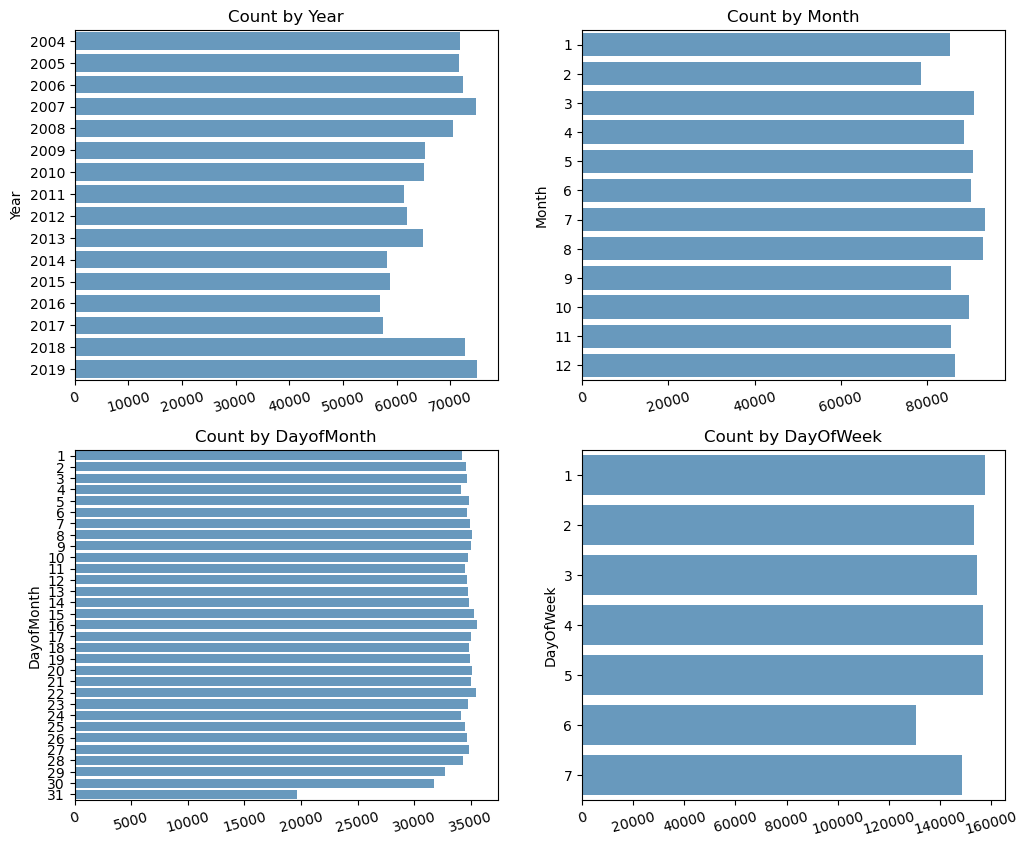

In [10]:
countplot_cols = ['Year', 'Month', 'DayofMonth', 'DayOfWeek']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

positions = [(0, 0), (0, 1), (1, 0), (1, 1)] # for axes

for i, col in enumerate(countplot_cols):
    row_idx, col_idx = positions[i]
    sns.countplot(data=df, y=col, ax=axes[row_idx][col_idx], color='#5A9BCB')
    axes[row_idx][col_idx].set_title(f'Count by {col}')
    axes[row_idx][col_idx].set_xlabel('') # title is good enough
    axes[row_idx][col_idx].set_ylabel(col)
    axes[row_idx][col_idx].tick_params(axis='x', rotation=15);

**Observations**:
- Year: A little less data for 2009 to 2017 but it's nothing alarming
- Month: Roughly same for all months
- Day of Month: For date 31 the count is just over half compared to other dates which is expected because only 7 out of 12 months have 31 days.
- Day of Week: Lowest count for Saturdays but not by a lot.

### Figure 2
**Question**: What is the distribution of departure and arrival delay times?

**Reasons**: Early departures should be less common than early arrivals so I want to see if the dataset argrees.

(969069, 1030341)

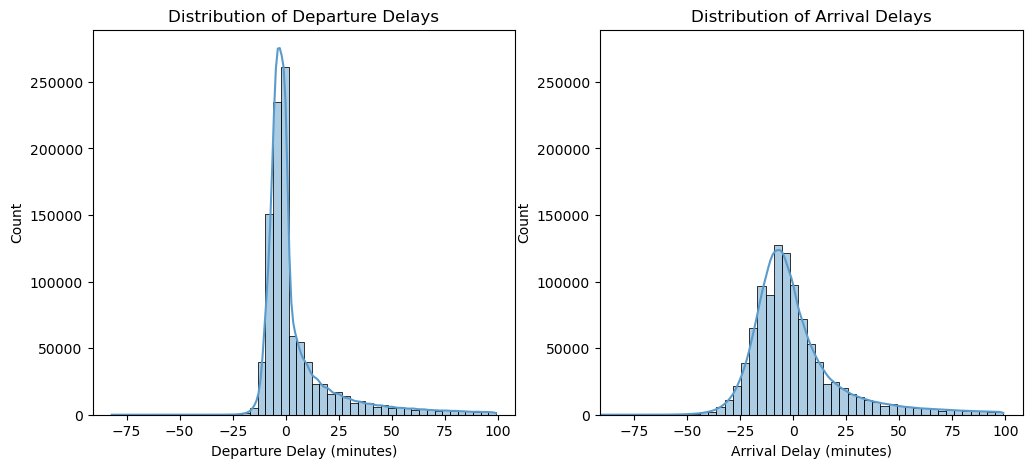

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# passing filtered data into the dataset to control outliers
sns.histplot(data=df[(df['DepDelay']<100)&(df['DepDelay']>-100)], x='DepDelay', bins=50, ax=ax1, kde=True, color='#5A9BCB')
ax1.set_title('Distribution of Departure Delays')
ax1.set_xlabel('Departure Delay (minutes)')
sns.histplot(data=df[(df['ArrDelay']<100)], x='ArrDelay', bins=50, ax=ax2, kde=True, color='#5A9BCB')
ax2.set_title('Distribution of Arrival Delays')
ax2.set_xlabel('Arrival Delay (minutes)')
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim());
df[df['DepDelay']!=0].shape[0], df[df['ArrDelay']!=0].shape[0]

**Observations**: As expected, arrival delay is more evenly distributed around 0, but it is not normally distributed. It might look like the overall count for departure delay is higher because the histogram is taller but this is not the case and in fact there are slightly more nonzero arrival delays than nonzero departure delays (1,030,341 vs 969,069 to be exact).

### Figure 3

Same as above but for delay reasons, i.e. `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`.

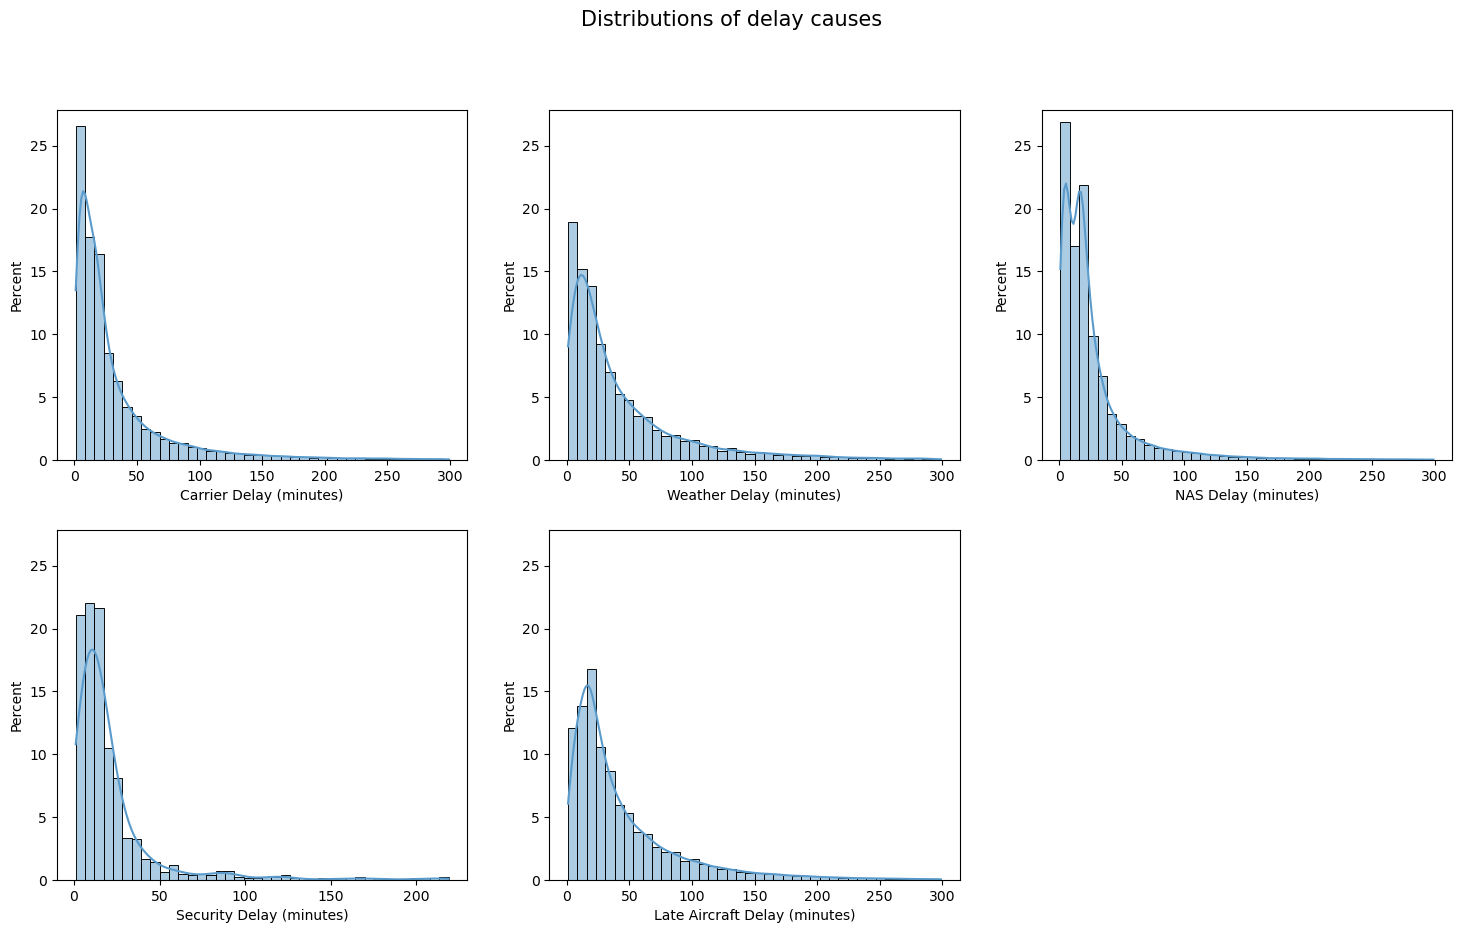

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
# only selecting delays of more than 0 so that the bin containing 0 doesn't overshadow the rest of the plot by being 100 times longer
sns.histplot(data=df[(df['CarrierDelay']>0)&(df['CarrierDelay']<300)], x='CarrierDelay',
             bins=40, stat='percent', kde=True, ax=ax1, color='#5A9BCB')
sns.histplot(data=df[(df['WeatherDelay']>0)&(df['WeatherDelay']<300)], x='WeatherDelay',
             bins=40, stat='percent', kde=True, ax=ax2, color='#5A9BCB')
sns.histplot(data=df[(df['NASDelay']>0)&(df['NASDelay']<300)], x='NASDelay',
             bins=40, stat='percent', kde=True, ax=ax3, color='#5A9BCB')
sns.histplot(data=df[(df['SecurityDelay']>0)&(df['SecurityDelay']<300)], x='SecurityDelay',
             bins=40, stat='percent', kde=True, ax=ax4, color='#5A9BCB')
sns.histplot(data=df[(df['LateAircraftDelay']>0)&(df['LateAircraftDelay']<300)], x='LateAircraftDelay',
             bins=40, stat='percent', kde=True, ax=ax5, color='#5A9BCB')
ax6.axis('off')

# setting labels and matching axes
labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
ax1_ylim = ax1.get_ylim()
for i, ax in enumerate(axes.flatten()[:5]):
    ax.set_ylim(ax1_ylim)
    ax.set_xlabel(f'{labels[i]} Delay (minutes)')
    
fig.suptitle('Distributions of delay causes', fontsize=15);

**Observations**: These causes only cause delays and not early departures, hence the positive x-axis limits. We can see that the shapes of all kdes are roughly the same, except for a difference in heights and widths. The `NASDelay` kde and histogram both suggest the distribution is bimodal but there are only a handful of flights with NASDelay so this may not be accurate.

### Figure 4

**Question**: `DepDel15` and `ArrDel15` are handy supplimentary columns that indicate whether or not the delay time was more than 15 minutes (1 for yes and 0 for no). We can use these to ask what percentage of flights were delayed by more than 15 minutes.

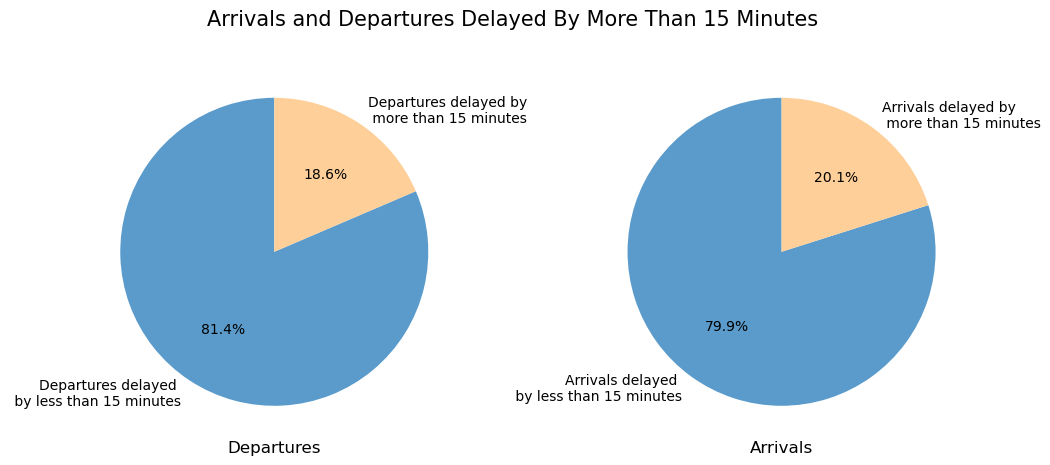

In [13]:
# pie charts of DepDel15 and ArrDel15
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.pie(df['DepDel15'].value_counts(), startangle=90, autopct='%1.1f%%', colors=['#5A9BCB', '#FECF99'],
        labels = ['Departures delayed \n by less than 15 minutes', 'Departures delayed by \n more than 15 minutes'])
ax1.text(0, -1.3, 'Departures', ha='center', fontsize=12) # placing title below pie chart
ax2.pie(df['ArrDel15'].value_counts(), startangle=90, autopct='%1.1f%%', colors=['#5A9BCB', '#FECF99'],
        labels = ['Arrivals delayed \n by less than 15 minutes', 'Arrivals delayed by \n more than 15 minutes'])
ax2.text(0, -1.3, 'Arrivals', ha='center', fontsize=12) # placing title below pie chart
fig.suptitle('Arrivals and Departures Delayed By More Than 15 Minutes', fontsize=15);

**Observation**: 20.1% of all flights were delayed by more than 15 minutes on arrival, and 18.6% on departure; the difference is not significant enough.

### Figure 5

**Question**: What is the distribution of AirTime?

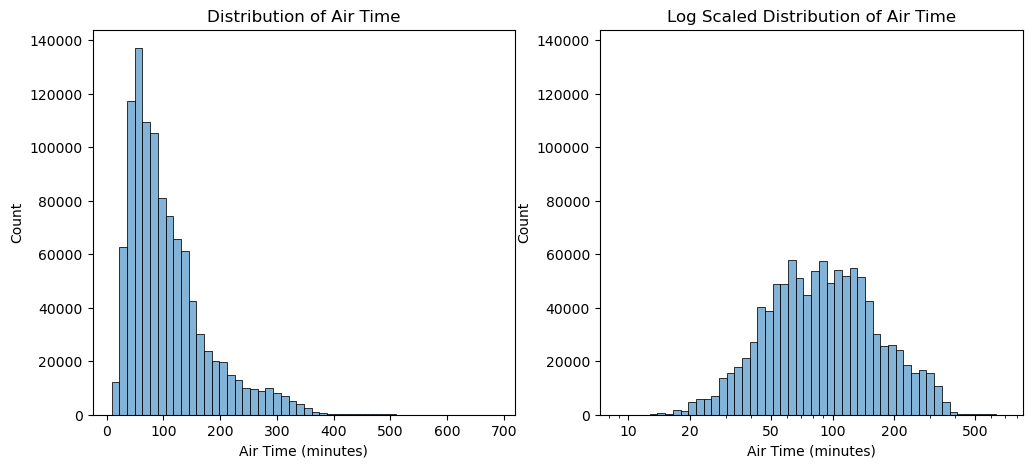

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['AirTime'], bins = 50, log_scale=False, color='#5A9BCB', ax=ax1)
sns.histplot(df['AirTime'], bins = 50, log_scale=True, color='#5A9BCB', ax=ax2)
ax1.set_title('Distribution of Air Time')
ax1.set_xlabel('Air Time (minutes)')
ax2.set_xlabel('Air Time (minutes)')
ax2.set_title('Log Scaled Distribution of Air Time')
ticks = [10, 20, 50, 100, 200, 500]
ax2.set_xticks(ticks, ticks)
ax2.set_ylim(ax1.get_ylim());

**Observations** The plot on the left is right skewed and has sparse values to the right, making the log-scaled plot on the right better for understanding the distribution as it is more symmetric.

### Figure 6

**Question**: What is the distribution of Distance?

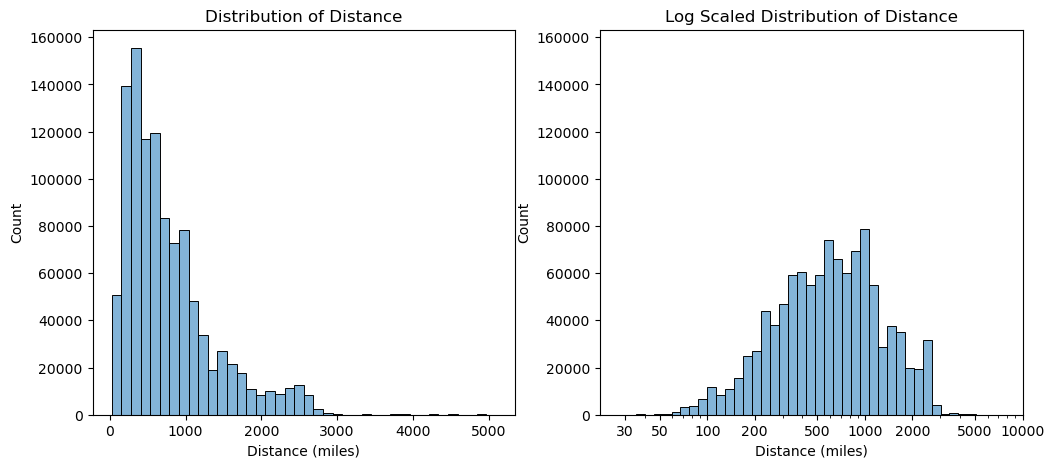

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Distance'], bins = 40, log_scale=False, color='#5A9BCB', ax=ax1)
sns.histplot(df['Distance'], bins = 40, log_scale=True, color='#5A9BCB', ax=ax2)
ticks = [30, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
ax1.set_title('Distribution of Distance')
ax1.set_xlabel('Distance (miles)')
ax2.set_title('Log Scaled Distribution of Distance')
ax2.set_xlabel('Distance (miles)')
ax2.set_xticks(ticks, ticks);
ax2.set_ylim(ax1.get_ylim());

**Observations**: The plot on the left is right skewed and has sparse vales on the right, making the log-scaled plot on the right better for understanding the distribution as it is more symmetric.

### Figure 7

**Question**: Which times blocks(`DepTimeBlk` and `ArrTimeBlk`) are the busiest?

**Reason**: To enable further study if something looks interesting.

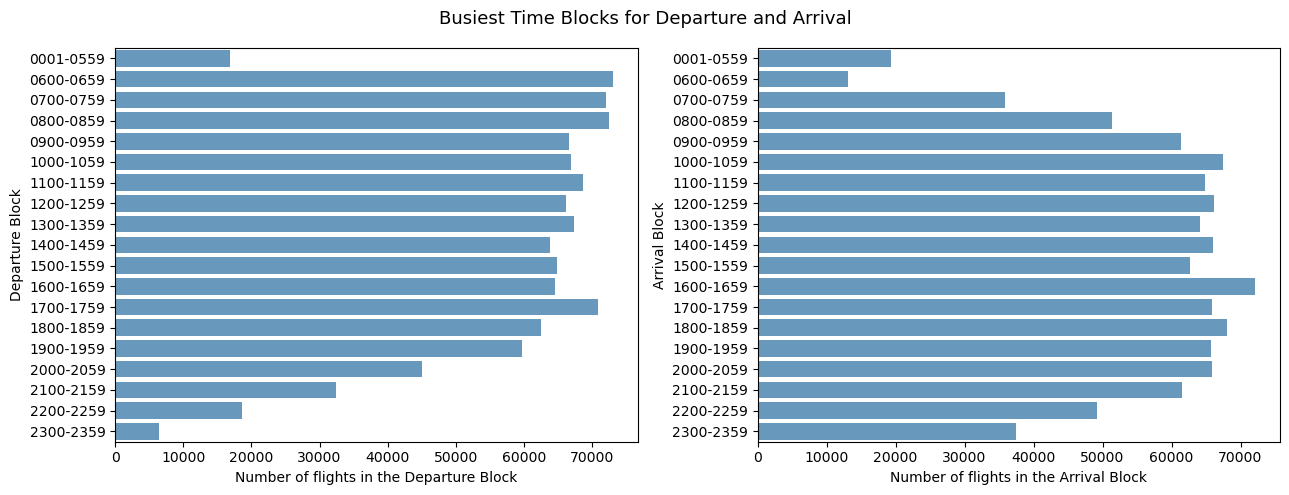

In [16]:
# creating labels for time blocks
time_blocks = ['0001-0559']
for i in range(6,10):
    time_blocks.append(f'0{i}00-0{i}59')
for i in range(10,24):
    time_blocks.append(f'{i}00-{i}59')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
sns.countplot(data=df, y='DepTimeBlk', order=time_blocks, ax=ax1, color='#5A9BCB')
ax1.set_xlabel('Number of flights in the Departure Block')
ax1.set_ylabel('Departure Block')
sns.countplot(data=df, y='ArrTimeBlk', order=time_blocks, ax=ax2, color='#5A9BCB')
ax2.set_xlabel('Number of flights in the Arrival Block')
ax2.set_ylabel('Arrival Block')
fig.suptitle('Busiest Time Blocks for Departure and Arrival', fontsize=13)
plt.tight_layout(); # to avoid overlap of plots

**Observation**: Most departures take place between 6am and 6pm, after which there's a steadily decline in the number of flights. Most arrivals are between 9am and 10pm.

### Figure 8

**Question**: Which airports are the busiest?

**Reasons**: To see later if busyness correlates to more delays.

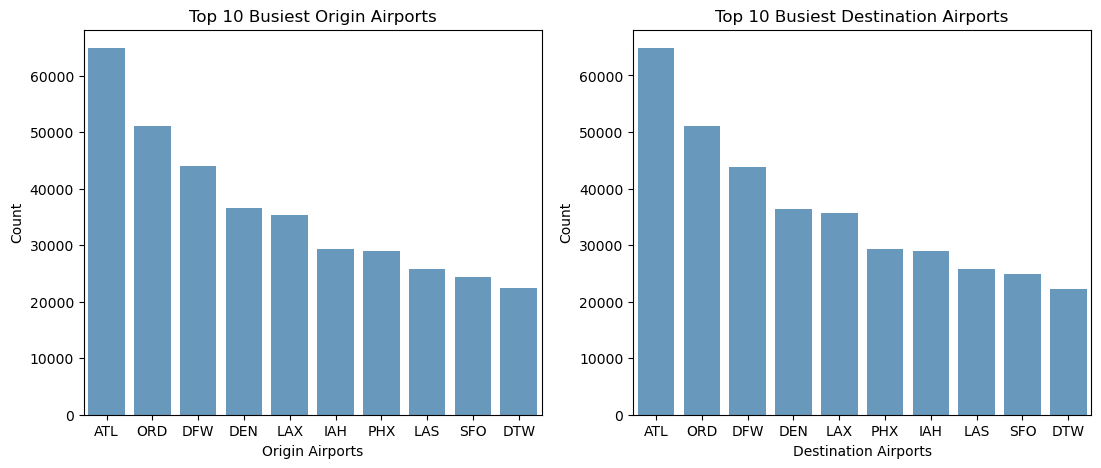

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
top_airports_origin = df['Origin'].value_counts().head(10) # top 10 origin airports by count
top_airports_dest = df['Dest'].value_counts().head(10) # top 10 destination airports by count
sns.barplot(x=top_airports_origin.index, y=top_airports_origin.values, color='#5A9BCB', ax=ax1)
sns.barplot(x=top_airports_dest.index, y=top_airports_dest.values, color='#5A9BCB', ax=ax2)
ax1.set_title('Top 10 Busiest Origin Airports')
ax1.set_ylabel('Count')
ax1.set_xlabel('Origin Airports')
ax2.set_title('Top 10 Busiest Destination Airports')
ax2.set_ylabel('Count')
ax2.set_xlabel('Destination Airports');

**Observations**: The barcharts are almost identical but with PHX and IAH ranks swapped. The busiest airport is Hartsfield–Jackson Atlanta International Airport, located in Atlanta, Georgia.

### Discussion of distributions of variables of interest, as well as any transformations needed for the plots.

The count plots showed that flight data was slightly less for the years 2009 to 2017 but not significantly so. Monthly flight volumes were consistent, while the 31st day of each month had lower counts — as expected, since not all months have 31 days. Saturdays had the lowest number of flights, though the difference wasn't large. These plots did not require any tranformations of the dataframe.

Histograms revealed that arrival delays were more evenly distributed around zero than departure delays, but neither followed a normal distribution. Interestingly, while departure delay counts looked higher in the plot, there were actually slightly more nonzero arrival delays (1,030,415) than departure delays (969,114). Delay cause distributions were all positively skewed — as they only represent delays — and had similar shapes, with a possible but uncertain bimodal pattern in NASDelay due to its smaller sample size. Similarly, the distributions of AirTime and Distance were also right skewed and the log-scaled histgrams for these showed a more symmetric distribution. Histograms did not require any major transformations of the dataframe; just filtered data needed to be sent into the `sns.histplot()` functions to avoid outliers.

The pie charts showed that 20.1% of flights were delayed by more than 15 minutes on arrival, and 18.6% on departure—a small and likely insignificant difference. For pie charts only the value counts of the relevant column needed to be passed into the `plt.pie()` functions.

Finally, the count plots at the end showed that most departures take place between 6am and 6pm, followed by a steadily decline in the number of flights, and most arrivals are between 9am and 10pm. Interestingly, the barcharts for the top 10 departure and arrival airports are almost identical. They showed that the busiest airport is Hartsfield–Jackson Atlanta International Airport, located in Atlanta, Georgia.

## Bivariate Exploration

In this section, I will examine relationships between pairs of variables to uncover patterns, trends, or potential correlations. Each analysis will follow the "Question–Visualization–Observations" framework: I will pose a question, create an appropriate visualisation to answer it, and record my observations. Plots will be designed carefully with suitable chart types, axis labels, titles, and legends to ensure clarity, while avoiding overplotting and misinterpretation of the data.

### Figure 9

**Question**: How strong is the correlation between `ArrDelay` and `DepDelay`?

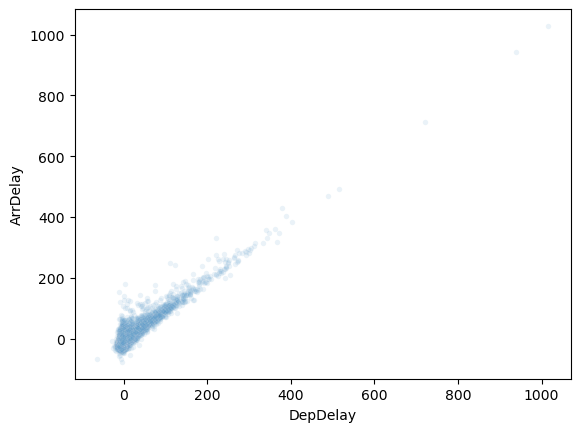

In [18]:
# initial plot
sns.scatterplot(data=df.sample(10000), x='DepDelay', y='ArrDelay', alpha=1/8, color='#5A9BCB', s=15);

**Observations**: This plot shows a strong correlation as expected, but it would be better to study this within the '-50 to 200' minute range as most flights are within that range. By doing this we could find out if being a little late on departure puts any pressure on the airlines to perform better for arrival. Alternatively, we could use an adaptation of log-scale for both the axes (adaptation because we also have negative values which log doesn't take).

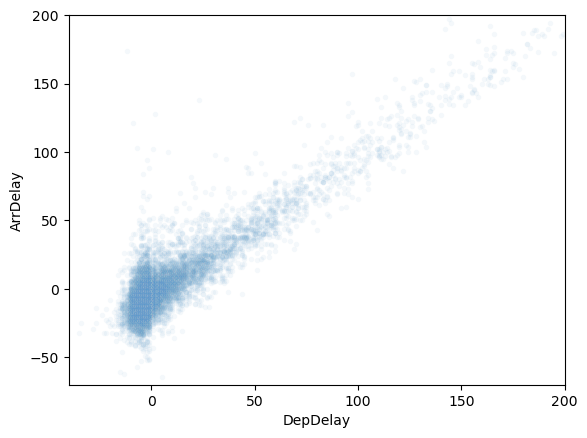

In [19]:
# second plot
# filtering out all flights that were not delayed on departure
sample = df[df['DepDelay']!=0].sample(10000) # for this plot and the next
sns.scatterplot(data=sample, x='DepDelay', y='ArrDelay', alpha=1/15, color='#5A9BCB', s=15)
plt.xlim(-40, 200)
plt.ylim(-70, 200);

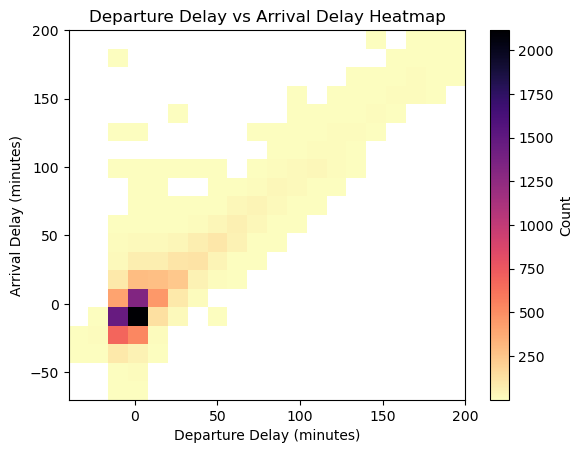

In [20]:
# third plot, using 'sample' variable from above so that both plot the same data
plt.hist2d(sample['DepDelay'], sample['ArrDelay'], bins=20, range=[[-40, 200], [-70, 200]], cmap='magma_r', cmin=0.5)
plt.colorbar(label='Count')
plt.xlim(-40, 200)
plt.ylim(-70, 200)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Departure Delay vs Arrival Delay Heatmap');

**Observations**: We can see that the heatmap provides more information about where exactly the majority of flights are located on the plot - around (0,0) - which isn't clear from the scatterplot.

### Figure 10

**Question**: How strong is the correlation between `Distance` and `AirTime`?

**Reasons**: Clearly flights over longer distances will have longer airtimes, but can we get a range of airtimes for each value of distance?

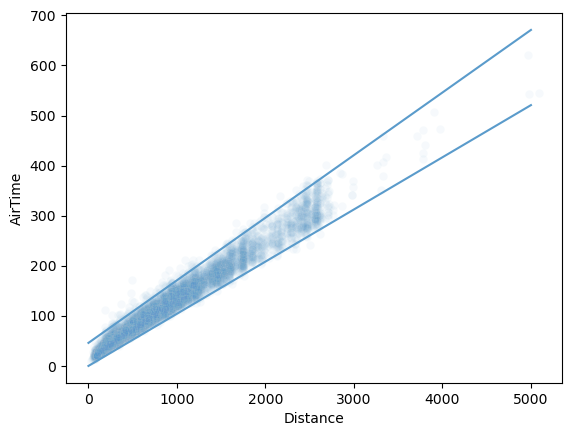

In [21]:
sns.scatterplot(data=df.sample(10000), x='Distance', y='AirTime', alpha=1/20, color='#5A9BCB')
x = np.linspace(0,5000, 100)
# getting the gradients by trial and error
plt.plot(x, x/9.6, color='#5A9BCB')
plt.plot(x, x/8 + 46, color='#5A9BCB');

**Remarks**: We can see that all values roughly fall within the two lines on the plot. A multivarite version of this plot with hues for delay status indicator would be a good idea. Also, stratified sampling could further help investigate the usefulness of the two lines on the plot in predicting the range of points.

### Figures 11

**Question**: Do busier airports have a higher delay rate? Is there a correlation?

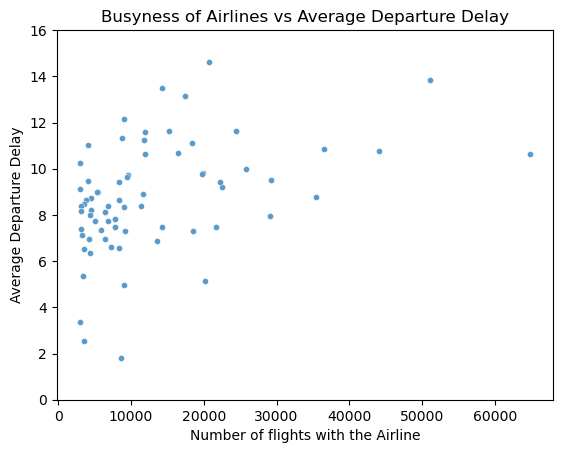

In [22]:
# airport busyness vs delays - mean dep delays for busy airports
# bivariate - airport count, mean of depdelay
# create df1 and df2 with data to merge, then plot and label the scatterplot
df1 = df['Origin'].value_counts().reset_index()
df2 = df.groupby('Origin')['DepDelay'].mean().reset_index(name='AvgDepDel')
df_airport_delays = pd.merge(df1, df2, on='Origin', how='left')
sns.scatterplot(data=df_airport_delays.head(70), x='count', y='AvgDepDel', color='#5A9BCB', s=20)
plt.ylim(0,16)
plt.xlabel('Number of flights with the Airline')
plt.ylabel('Average Departure Delay')
plt.title('Busyness of Airlines vs Average Departure Delay');

**Observations**: The scatter plot shows a very weak correlation so we cannot say if flights are more or less likely to be delayed based on the busyness of the airline alone. Let's see if it is better to plot airline busyness against their proportion of delays next.

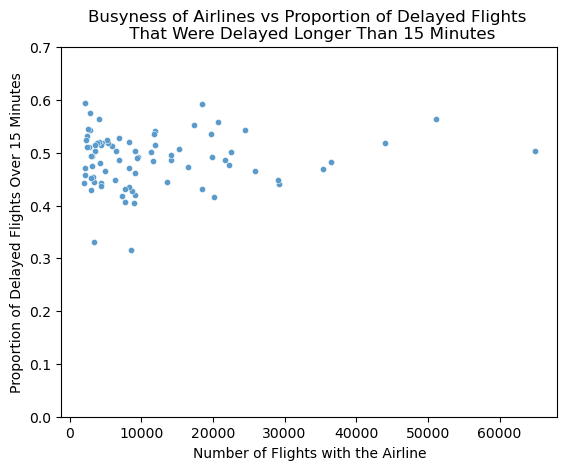

In [23]:
# depdel15 ratio for busier airports
# create df1 and df2 with data to merge, then plot and label the scatterplot
df1 = df['Origin'].value_counts().reset_index()
df2 = df[df['DepDelay']>0].groupby('Origin')['DepDel15'].mean().reset_index(name='AvgDepDel15')
df_airport_delays_prop = pd.merge(df1, df2, on='Origin', how='left')
sns.scatterplot(data=df_airport_delays_prop.head(80), x='count', y='AvgDepDel15', color='#5A9BCB', s=20)
plt.ylim(0,0.7)
plt.xlabel('Number of Flights with the Airline')
plt.ylabel('Proportion of Delayed Flights Over 15 Minutes')
plt.title('Busyness of Airlines vs Proportion of Delayed Flights \n That Were Delayed Longer Than 15 Minutes');

**Observations**: The scatter plot shows no correlation because it looks like all points are around the line 'y=0.5', which does not indicate a dependncy of y on x, so we cannot predict if flights are more or less likely to be delayed by more than 15 minutes based on the busyness of the airline.

### Figure 12

**Question**: Which time blocks have the highest mean delay?

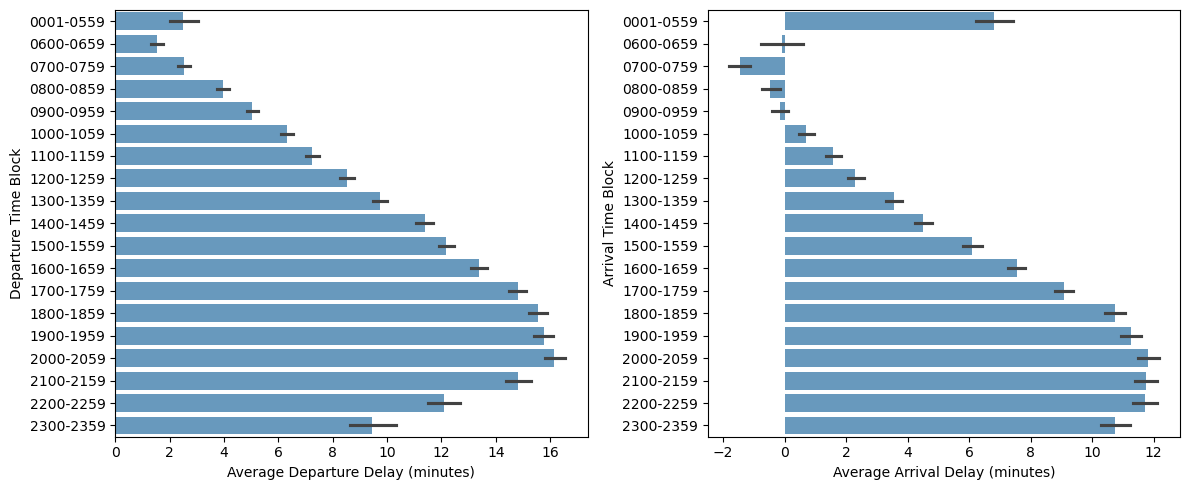

In [24]:
# dep delays by departure block
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# left plot
sns.barplot(data=df, y='DepTimeBlk', x='DepDelay', order=time_blocks, errorbar=('ci',95), orient='h', color='#5A9BCB', ax=ax1)
ax1.set_xlabel('Average Departure Delay (minutes)')
ax1.set_ylabel('Departure Time Block')

# right plot
sns.barplot(data=df, y='ArrTimeBlk', x='ArrDelay', order=time_blocks, errorbar=('ci',95), orient='h', color='#5A9BCB', ax=ax2)
ax2.set_xlabel('Average Arrival Delay (minutes)')
ax2.set_ylabel('Arrival Time Block')
plt.tight_layout();

**Observations**: The shapes are almost like sine curves, and we can see that 6am to 10am have the lowest average delays. The smoothness of the shape suggests delays have a strong dependency on time blocks. It's almost like the delays 'pile up', so that each delay plays an important role in causing upcoming delays, but there are also other factors at play such as air traffic and peak travel times.

### Figure 13

**Question:** How are the delay causes - CarrierDelay, WeatherDelay, etc. -  distributed?

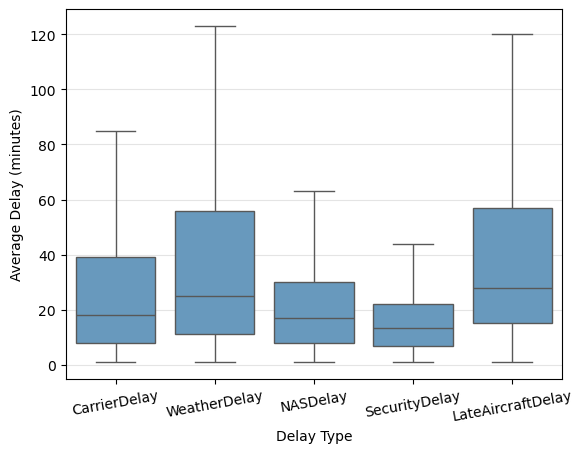

In [25]:
# first melt the data into long format for box plotting
delay_type = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_types_melted = pd.melt(df[delay_type], var_name='Delay Type', value_name='Average Delay (minutes)')
ax = sns.boxplot(delay_types_melted[delay_types_melted['Average Delay (minutes)']!=0], # only non-zero values for a more accurate plot
            x='Delay Type', y='Average Delay (minutes)', showfliers=False, color='#5A9BCB') # outliers off since they compress the box plots
plt.xticks(rotation=10)
ax.grid(True, axis='y', alpha=1/3);

**Observation**: By design, the min value for each box plot starts at 0. We can see that `WeatherDelay` and `LateAircraftDelay` have similar quantiles, although `LateAircraftDelay` has a slightly higher mean , Q1 and Q2. On the other hand, `SecurityDelay` has the lowest quantiles, suggesting this results in the smallest delays, which makes sense because airports have more control over security than the other delay causes.

### Figure 14

**Question**: Are longer flights delayed more on arrival?

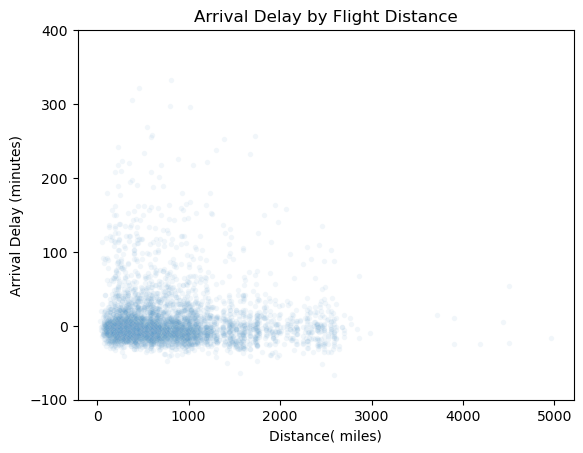

In [26]:
# arr delay by distance, sample of 5000
sns.scatterplot(data=df.sample(5000), x='Distance', y='ArrDelay', alpha=1/12, color='#5A9BCB', s=15)
plt.xlabel('Distance( miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay by Flight Distance')
plt.ylim(-100, 400);

**Observations**: This shows no correlation.

### Figure 15

**Question**: Among all flights delayed by more than 15 minutes, which delay cause has the greatest average delay?

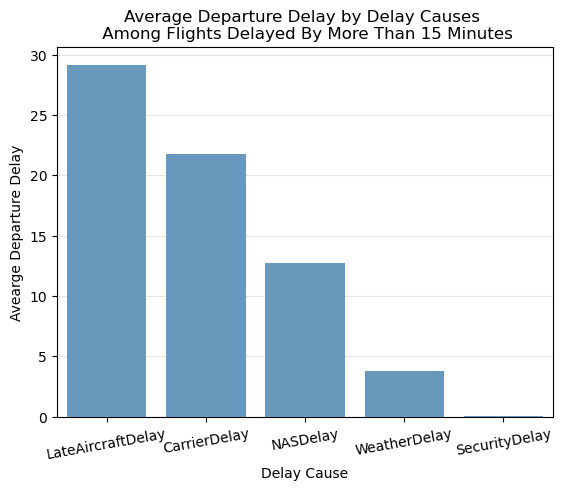

In [27]:
# from the flights with depdel15 = 1, what causes the biggest delay? ie mean of delay causes
# the condition below selects rows with depdel15 = 1 that have at least one non-zero delay cause
data = df[(df['DepDel15']==1)&(df['CarrierDelay']+df['WeatherDelay']+df['NASDelay']+df['SecurityDelay']+df['LateAircraftDelay']!=0)][[
        'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
ax = sns.barplot(data.mean().sort_values(ascending=False), color='#5A9BCB', zorder=3) # zorder so grid lines are not over the bars
plt.xticks(rotation=10)
plt.xlabel('Delay Cause')
plt.ylabel('Avearge Departure Delay')
plt.title('Average Departure Delay by Delay Causes \n Among Flights Delayed By More Than 15 Minutes')
ax.grid(True, axis='y', alpha=1/3);

**Observations**: It looks like late aircrafts cause the most serious delays as they have the highest mean departure delay among all causes. On the other hand, delays caused because of security reasons have the lowest mean departure of delay.

### Summary of observations in this part of the investigation.

**Figure 9** examined the correlation between departure and arrival delays. A strong positive relationship was found — flights that depart late generally arrive late. This was clearly visible in both scatterplots and a heatmap, which revealed a dense cluster of on-time flights near (0,0). Filtering delays to the –50 to 200 minute range improved clarity, although using log-scale or adding delay status as hue could further enhance the plot.

**Figure 10** analysed the relationship between flight distance and airtime, showing a clear linear correlation with most values falling within two bounding guide lines. However, **Figure 14** showed no significant correlation between distance and arrival delay, indicating that longer flights are not necessarily more delayed. This implies that flight length alone is not a strong predictor of delay severity.

**Figures 11** addressed whether busier airports experience more delays. The scatterplots showed no meaningful correlation between airport traffic volume and the proportion of flights delayed over 15 minutes. In contrast, **Figure 12** revealed a distinct time-of-day effect, with delays lowest in the early morning and peaking in the evening. This pattern suggests that delays build up over the day due to cumulative disruptions and traffic congestion.

Lastly, **Figure 13** and **Figure 15** focused on the causes of severe delays (over 15 minutes). Late aircraft was the most significant contributor, followed by NAS and carrier delays. Weather and security delays had the lowest average impact. This indicates that internal operational factors play a larger role in prolonged delays than external causes.

### Interesting relationships between the other features (not the main features) of interest

Several secondary or supporting features revealed interesting patterns and relationships beyond the primary variables under investigation:

- **Time of day** emerged as a significant factor in delay patterns, even when it wasn't the main feature in the analysis. In **Figure 12**, both departure and arrival delays followed a smooth, wave-like curve with delays peaking in the evening and bottoming out in the early morning. This suggests a systemic build-up of delays throughout the day, influenced by traffic flow and operational constraints.
- **Flight distance**, while not directly related to delay in **Figure 14**, was strongly linked to airtime in **Figure 10**, forming a tightly bounded linear region. This relationship was consistent across the sample, implying that airlines operate within a predictable range of speeds and flight durations.
- **Airport activity** levels also provided an indirect insight. Though **Figure 11** showed no strong correlation between the number of flights and delay rates, the uniformity of delay proportions across both busy and quiet airports suggests that other operational factors — such as aircraft availability or scheduling — might be more critical than airport size alone.

These secondary patterns support the idea that flight delays are multi-causal and often systemic, influenced by timing, network effects, and airline operations more than individual factors alone.

## Multivariate Exploration

This section contains multivariate plots involving three or more variables to extend the data exploration. The investigations are justified and build upon the analyses conducted in previous sections. Variable encodings are chosen carefully, with appropriate colour schemes, markers, or facet divisions, while avoiding overplotting and the misrepresentation of ordinal data.

In [28]:
# fucntion for creating heatmaps, returns axis for easy modifications later
def heatmap_creator(data, x, y, cmap='coolwarm', figsize=(9, 6), stat='count', mean_val='', fmt='d', cbar_label=''):
    if stat == 'count':
        data=data.groupby([x, y]).size().reset_index(name='count')
        data=data.pivot(columns=x, index=y, values='count') #columns is x variable and index is y
    elif stat == 'mean':
        data=data.groupby([x, y])[mean_val].mean().reset_index(name=f'mean_{mean_val}')
        data=data.pivot(columns=x, index=y, values=f'mean_{mean_val}')
        
    plt.figure(figsize=figsize)
    ax = sns.heatmap(data=data, cmap=cmap, annot=True, fmt=fmt, cbar_kws={'label':cbar_label})
    return ax;

### Figure 16

**Question**: When are arrival delays the worst across the week?

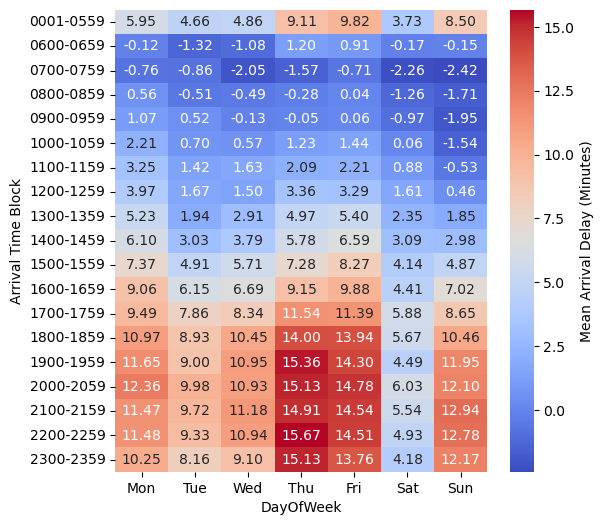

In [29]:
# use the function above to create a heatmap, then modify ticks and labels
# highlight patterns in average arrival delays across combinations of time blocks and days
ax = heatmap_creator(df, 'DayOfWeek', 'ArrTimeBlk', 'coolwarm', (6, 6), 'mean', 'ArrDelay',
                     fmt='.2f', cbar_label='Mean Arrival Delay (Minutes)')
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(days, rotation=0)
ax.tick_params(axis='y', rotation=0)
plt.ylabel('Arrival Time Block');

**Observations**: From the heatmap it is clear that the most severe arrival delays occur after 5pm on Thursday, followed closely by Friday, where the average delay is around 14 to 15 minutes for all flights! Interestingly, on the very next day, Saturday, the average arrival delay from 5pm to midnight is the lowest for the entire week, with the average delay being only around 5 minutes.

### Figure 17

**Question**: When are departure delays the worst across the week?

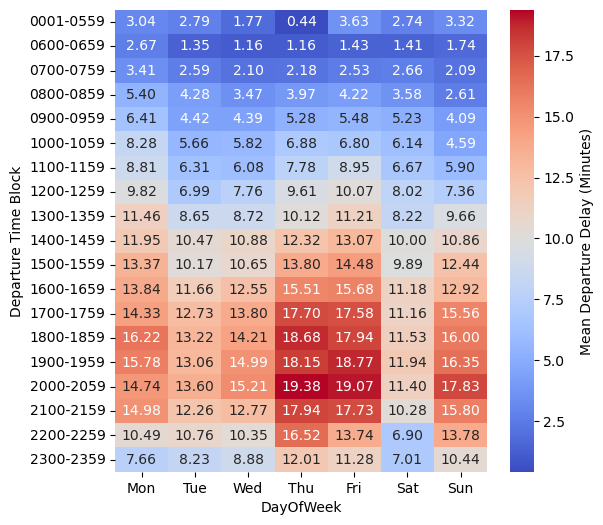

In [30]:
# highlight patterns in average departure delays across combinations of time blocks and days.
ax = heatmap_creator(df, 'DayOfWeek', 'DepTimeBlk', 'coolwarm', (6, 6), 'mean', 'DepDelay',
                     fmt='.2f', cbar_label='Mean Departure Delay (Minutes)')
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(days, rotation=0)
ax.tick_params(axis='y', rotation=0)
plt.ylabel('Departure Time Block');

**Observations**: Much like arrival delays in Figure 16, the most severe departure delays occur between 5pm and 11pm on Thursday and Friday, where the average delay is around 17 to 18 minutes for all flights! Interestingly, on the very next day, Saturday, the average departure delay from 5pm to 11pm is lowest for the entire week, with the average delay being around 11 minutes.

### Figure 18

**Question**: For the busiest airports, what is their mean departure delay across the year?

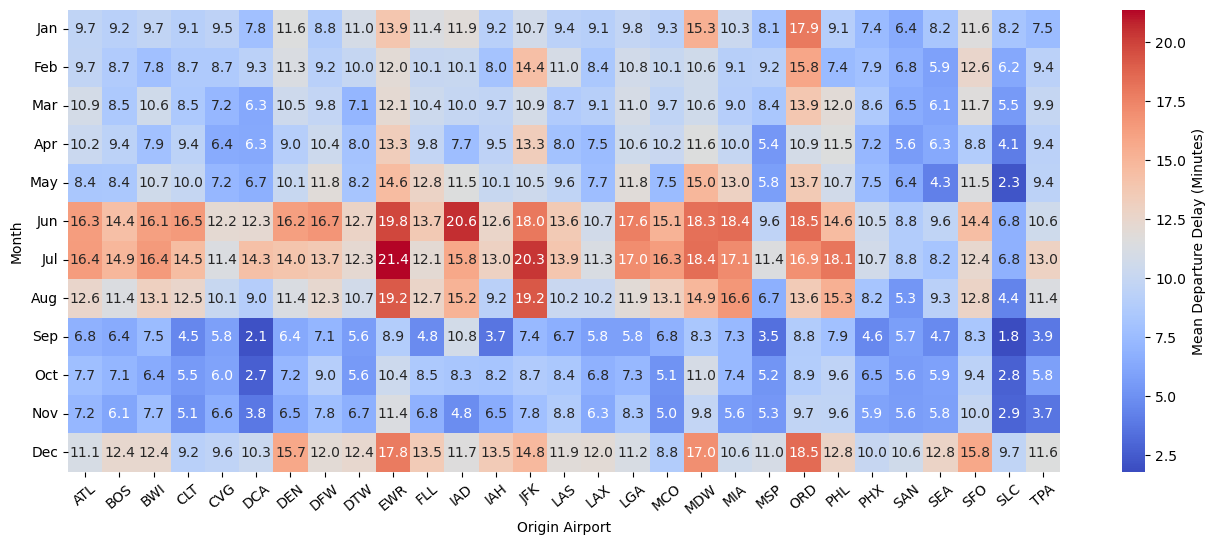

In [31]:
# only selecting airports with more than 10000 entries in the dataframe because there are too many airports (392)

data = (df['Origin'].value_counts()>10000).reset_index(name='count')
data = data.loc[data['count'] == True, 'Origin'].values # Origin airports with more than 10000 entries in dataframe
data = df.loc[df['Origin'].isin(data)]

ax = heatmap_creator(data, 'Origin', 'Month', 'coolwarm', (16, 6), 'mean', 'DepDelay', fmt='.1f', cbar_label='Mean Departure Delay (Minutes)')
plt.xlabel('Origin Airport')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_yticklabels(months, rotation=0)
ax.tick_params(axis='x', rotation=40);

**Observations**: We can see that the June, July, August, and December have the highest mean departure delay. In these months, EWR, ATL, BOS, BWI, IAD, JFK, MDW, ORD, PHL are airports with the highest mean departure delays. On the other hand, September, October, and November have the lowest mean departure delay. In these months, DCA and SLC are airports with the lowest mean departure delay. All of these airports have over 10000 datapoints in the dataframe each, so insufficient data is not as issue.

### Figure 19

**Question**: When are the worst weather delays across the year?

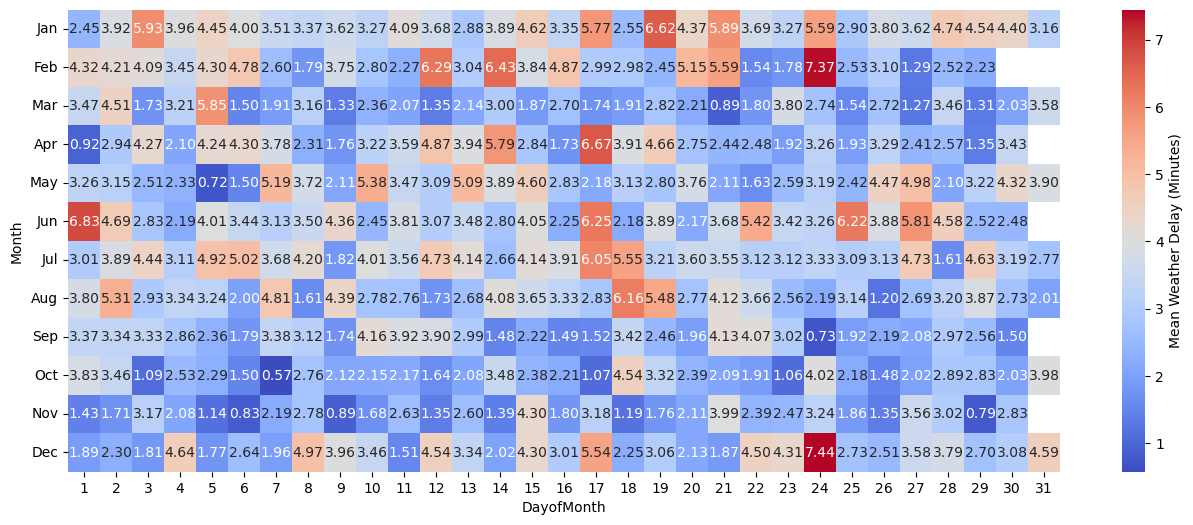

In [32]:
# reveal weather-prone periods in the year.

ax = heatmap_creator(df[df['DepDelay']>15], 'DayofMonth', 'Month', 'coolwarm', (16, 6), 'mean', 'WeatherDelay',
                     fmt='.2f', cbar_label='Mean Weather Delay (Minutes)')
ax.set_yticklabels(months, rotation=0);

**Observations**: The date with the highest mean weather delay is 24 December (Christmas Eve). Although this falls in winter, it isn’t necessarily a day with particularly severe weather compared to the rest of the year. Weather delays should reflect natural conditions, so there’s no clear reason for Christmas Eve to stand out. However, it is well known that Christmas Eve often experiences heavy delays for other reasons, suggesting that the reported “weather” delays may not be entirely accurate. This points to the possibility of human error in how delay causes are recorded — for example, staff might be misattributing or proportionally splitting overall departure delays into categories in a simplified or careless way.

### Figure 20

**Question**: Is there any interesting relationship between delays, distance travelled and elapsed time?

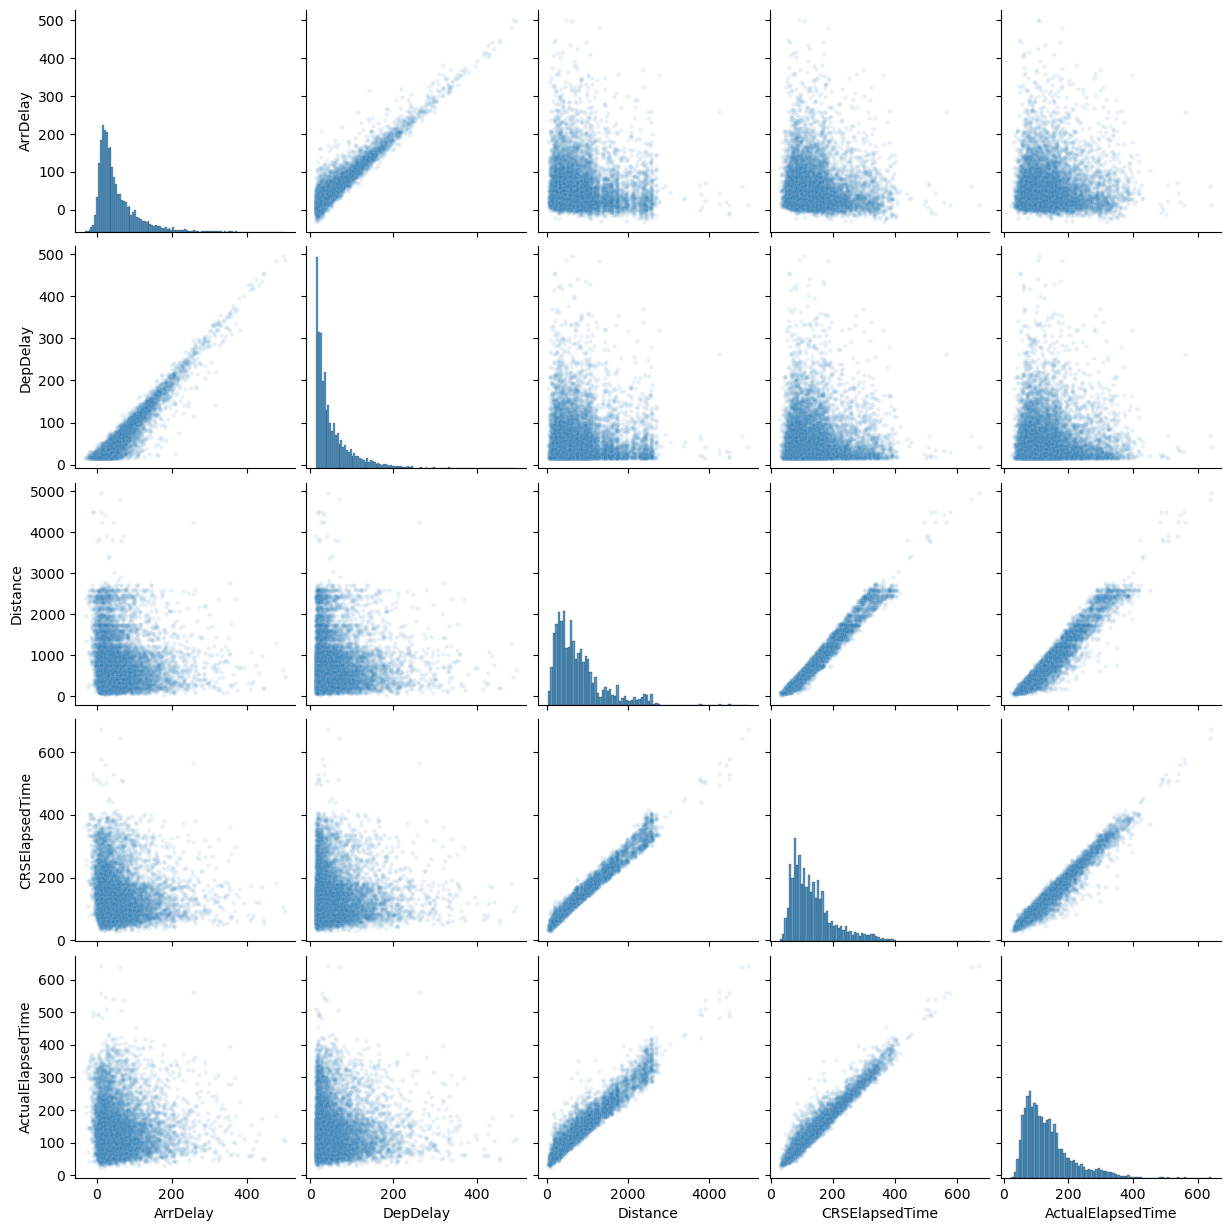

In [33]:
# sampling 10000 datapoints
sample = df[(df['DepDelay']>=15)&(df['DepDelay']<500)].sample(10000) # <500 to avoid outliers
cols = ['ArrDelay', 'DepDelay', 'Distance', 'CRSElapsedTime', 'ActualElapsedTime']
sns.pairplot(sample[cols], plot_kws={'alpha':1/10, 's':10});

**Observations**: ArrDelay and DepDelay only correlate with each other, whereas Distance correlates strongly and positively with elapsed time. In the CRSElapsedTime vs ActualElapsedTime plot, more  points are closer to axis with ActualElapsedTime than CRSElapsedTime, indicating that more flights take longer instead of less than the CRS predicted elapsed time.

### Figure 21

**Question**: Which airlines are consistently more late and how much data do we have to support this?

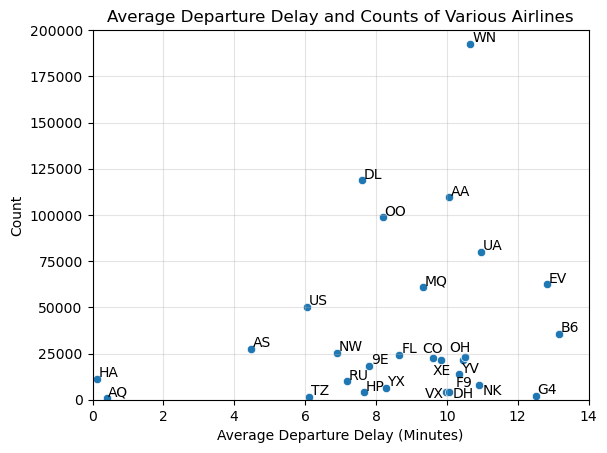

In [34]:
# below is a kronecker delta function, used later to make changes to text positions for disambiguation
def d(i,j):
    vec = np.zeros(j)
    vec[i] = 1
    return vec

airline_delays = df.groupby('IATA_CODE_Reporting_Airline')['DepDelay'].agg(['mean', 'count']).sort_values('mean')
airline_delays = airline_delays.reset_index() # turns this into a dataframe

ax = sns.scatterplot(data=airline_delays, x='mean', y='count')
text = airline_delays['IATA_CODE_Reporting_Airline'].values
n=len(text)
# x_ and y_fixes are like error terms added to the text coordinates to modify text positions (values obtained by trial and error)
x_fixes = - 0.35*d(14,n) - 0.3*d(15,n) - 0.65*d(16,n) + 0.05*d(17,n) - 0.15*d(19,n) - 0.1*d(20,n) - 0.5*d(21,n) + 0.05*d(23,n)
y_fixes = 1500*d(14,n) - 9000*d(15,n) - 4000*d(16,n) - 3800*d(17,n) - 8000*d(19,n) - 7500*d(20,n) + 2000*d(21,n) - 6000*d(23,n)
x_coords = airline_delays['mean'].values + x_fixes
y_coords = airline_delays['count'].values + y_fixes
for i in range(n):
    plt.annotate(text[i], (x_coords[i]+0.05, y_coords[i] + 1000))
plt.xlabel('Average Departure Delay (Minutes)')
plt.ylabel('Count')
plt.title('Average Departure Delay and Counts of Various Airlines')
plt.xlim(0,14)
plt.ylim(0,200000)
ax.grid(True, alpha=1/3);

**Observations**: WN has the highest count and an average departure delay of 10.5 minutes. On the other hand, AQ has an average departure delay of only 0.5 but there is insufficient data to support this.

### Figure 22

**Question**:

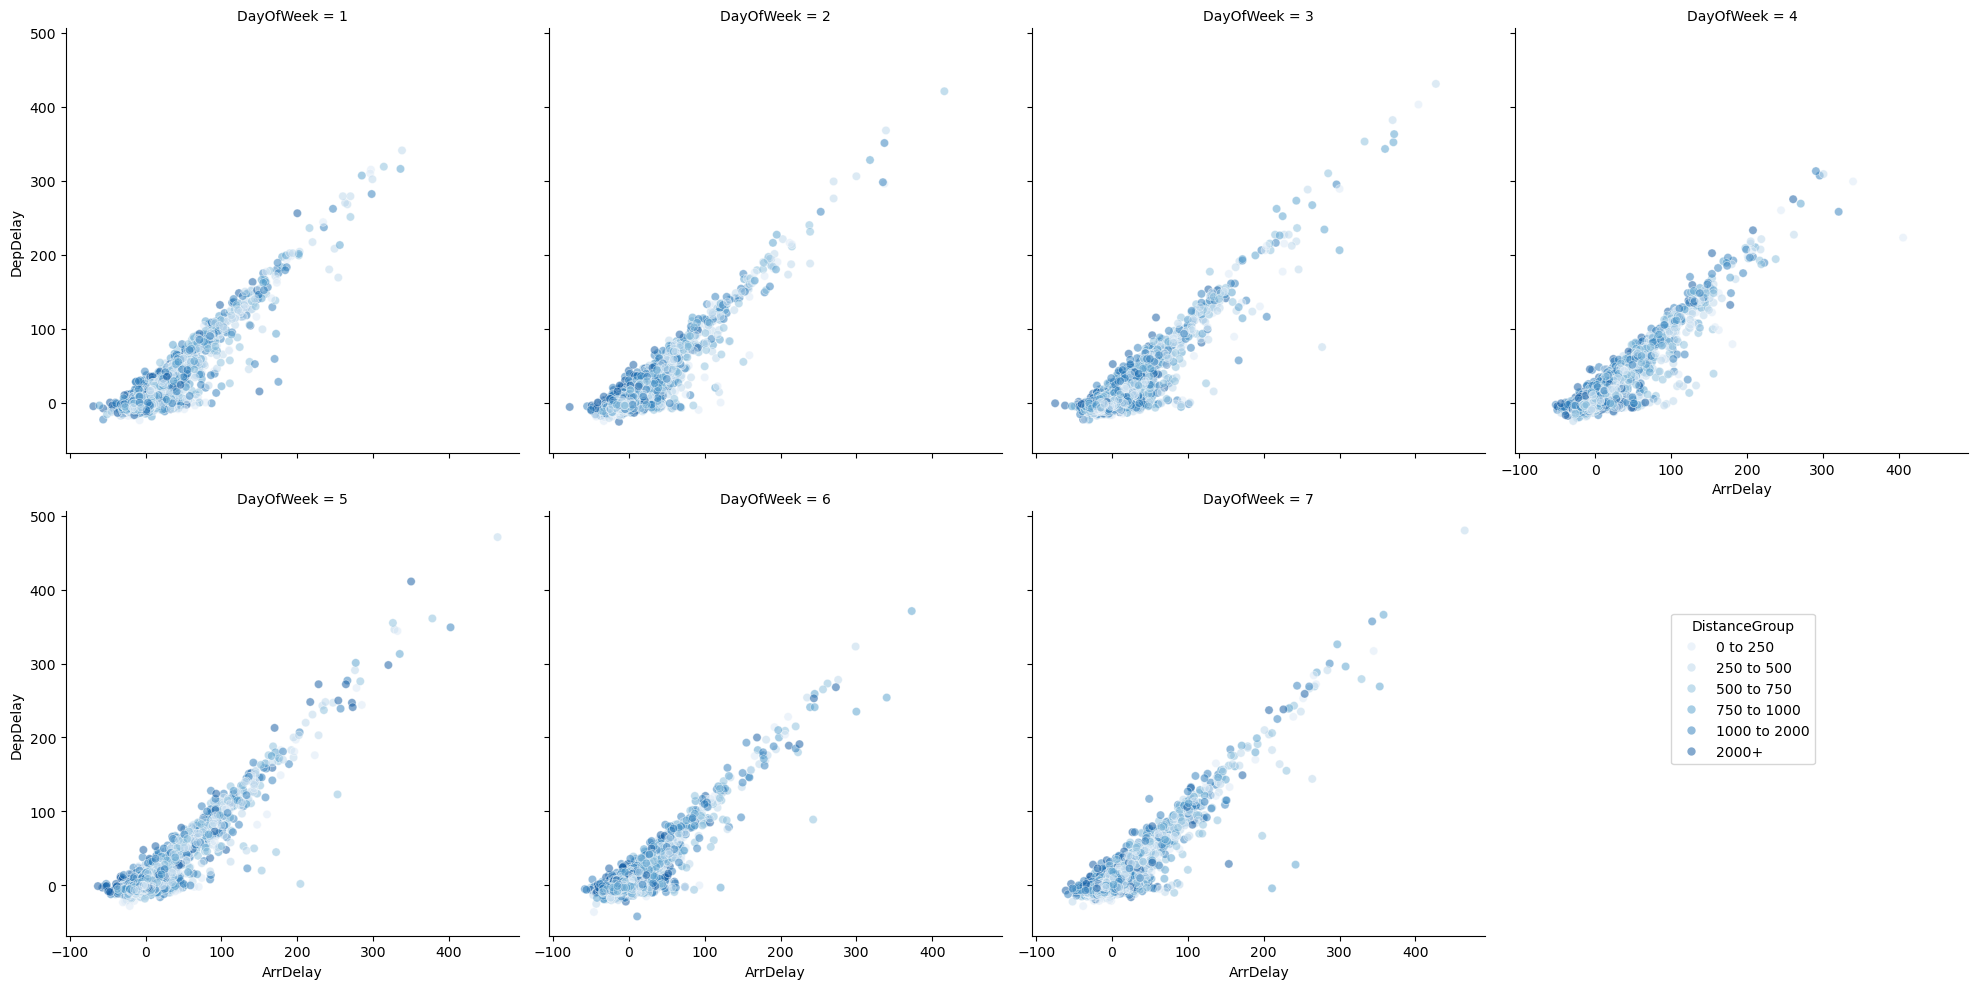

In [35]:
# facet grid allows comparisons of depdelay vs arrdelay across different days.
bins = [0, 250, 500, 750, 1000, 2000, 9999]
labels = ['0 to 250', '250 to 500', '500 to 750', '750 to 1000', '1000 to 2000', '2000+']
df['DistanceGroup'] = pd.cut(df['Distance'], bins=bins, labels=labels, right=False, ordered=True)

# roughly 5000 points for each plot (7 days so 35000 total)
g = sns.relplot(data=df[df['DepDelay']<500].sample(35000), palette=sns.color_palette('Blues', 6), # <500 to avoid outliers
            x='ArrDelay', y='DepDelay', col='DayOfWeek', hue='DistanceGroup', kind='scatter', alpha=1/2, col_wrap=4)
g._legend.set_bbox_to_anchor((0.85, 0.3))
g._legend.set_frame_on(True);

**Observation**: This further confirms what we found earlier - that distance has little to no effect on arrival and departure delays.

### Figure 23

**Question**: We saw earlier that late aircrafts cause the most serious delayes, so what new information, if any, does the scatterplot of `DepDelay` vs `ArrDelay` from Figure 9 provide when hued by `LateAircraftDelay` indicator?

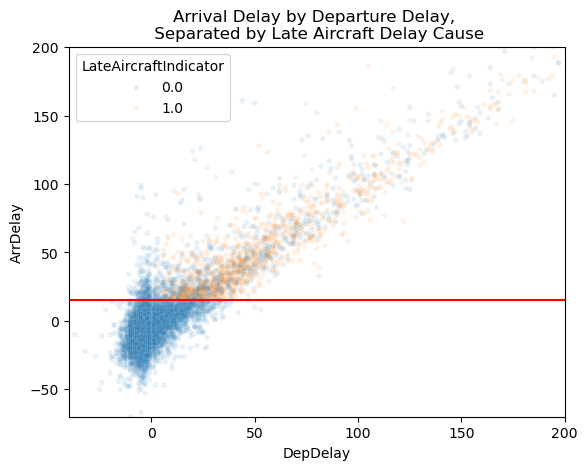

In [36]:
# creating indicator for late aircraft delay column
df['LateAircraftIndicator'] = df['LateAircraftDelay'].apply(lambda x: x if x==0 else 1)

# plot
sns.scatterplot(df[df['DepDelay']!=0].sample(10000), x='DepDelay', y='ArrDelay', alpha=1/10, s=15, hue='LateAircraftIndicator')
plt.xlim(-40, 200)
plt.ylim(-70, 200)
plt.axhline(y=15, color='red')
plt.title('Arrival Delay by Departure Delay, \n Separated by Late Aircraft Delay Cause');

In [37]:
# calculating the proportion of late aircraft flights that were delayed by more than 15 minutes on arrival to the destination
df[(df['LateAircraftDelay']>=1)&(df['ArrDelay']>=15)].shape[0]/df[(df['LateAircraftDelay']>=1)].shape[0]

1.0

**Observation**: This might not look interesting at first because `LateAircraftDelay` value is only assigned to flights delayed by more than 15 minutes, but that is departure delay and not arrival delay. In the figure we can see that all orange dots are above the line `y=15`, which tells us that there is a very strong correlation between `ArrDelay >= 15` and `LateAircraftDelay >= 1`. The fact that the number above computes exactly to 1 tells us that literally every single flight with a recorded `LateAircraftDelay` value of more than 1 was also delayed on arrival and by more than 15 minutes.

On the other hand, it should be `DepDelay >= 15` that splits the hues since `LateAircraftDelay` is only supposed to be assigned to flights delayed by more than 15 minutes on departure. So why does it not? One possible explanation is that Airlines are already aware if a an aircraft is going to be late, so they speed up the other processes which then results in overall `DepDelay` of less than 15.

### Relationships observed in this part of the investigation.

**Figures 16** and **17** reveal strong temporal patterns in delays. Both arrival and departure delays peak between **5pm and midnight on Thursdays and Fridays**, with average delays reaching **14–18 minutes**. Strikingly, Saturdays show the lowest delays in the same evening period, suggesting that congestion rather than weather is the main driver of late-week disruptions.

Looking at seasonality in **Figure 18**, mean departure delays are highest during the **summer months (June–August)** and in **December**, particularly at major hubs such as **EWR, ATL, JFK**, and **ORD**. Conversely, **September–November** experience the lowest delays, with airports like **DCA** and **SLC** performing relatively well. **Figure 19** sharpens this perspective by focusing on weather delays: while Christmas Eve (Dec 24) shows the highest recorded weather-related delay, the anomaly likely reflects **misclassification or reporting bias**, as weather conditions alone do not explain the spike.

**Figures 20, 22**, and **23** explore relationships between delays, distance, and causes. Pairplots in **Figure 20** confirm that arrival and departure delays correlate only with each other, while distance relates to elapsed time but not delays. This is reinforced in **Figure 22**, where scatterplots by distance group show no systematic effect of distance on delays. **Figure 23**, however, highlights a **perfect correlation** between **Late Aircraft Delay** and **arrival delays** exceeding 15 minutes — every flight tagged with this cause was indeed late on arrival. This raises questions about how airlines assign delay causes, as some flights with departure delays under 15 minutes still carried the Late Aircraft label.

Finally, **Figure 21** turns to airlines, showing wide variation in mean departure delays. **WN**, with the largest number of flights, averages **10.5 minutes** of delay, whereas **AQ** appears punctual with an average of just **0.5 minutes**. However, the latter has too little data for a reliable conclusion. Together, these figures suggest that systematic congestion patterns, seasonal demand, and reporting practices drive much of the delay data, with distance playing little role.

### Interesting and surprising interactions between features.

The data reveals several surprising interactions between features. **Delays are not just a matter of traffic volume:** while Thursday and Friday evenings show sharp increases in delays, Saturday evenings remain relatively smooth despite similar schedules. This points to a weekday – time interaction where business travel demand amplifies congestion. Another anomaly is the unusually high “weather delays” on **Christmas Eve**. Given that winter days with worse weather don’t show the same spike, this suggests **misclassification**, with airlines attributing holiday-related disruptions such as staff shortages or capacity strain to weather.

**Delay causes** also interact in revealing ways. Every flight flagged for “Late Aircraft Delay” recorded an arrival delay of over 15 minutes, even when departure delays were modest, indicating possible redundancy in how causes are logged. Meanwhile, flight distance shows almost no relationship with delays, which are instead dominated by schedule and airport factors. In contrast, the **strong correlation** between **departure** and **arrival** delays highlights the compounding effect of initial slippage: once late at takeoff, recovery is rare.

## Conclusions

The data exploration revealed several key patterns in flight delays. **Univariate** analysis showed that arrival and departure delays are common but skewed, with arrival delays slightly more frequent than departure delays. Flights are busiest during the evening, particularly between 5pm and midnight for departures and arrivals, with major hubs like Atlanta (ATL, Figure 8) consistently handling the most traffic. While most delay causes are positively skewed, **Late Aircraft Delay** stands out as the **largest contributor** to prolonged delays, and overall flight distance shows little impact on delay severity. Seasonal trends are also evident, with summer months and December showing higher average delays at major airports.

**Bivariate** and **multivariate** exploration highlighted the interactions driving these delays. Delays peak in the evenings on **Thursdays and Fridays**, yet **Saturdays** remain relatively smooth despite similar flight schedules, suggesting systemic congestion rather than sheer volume. **Arrival** and **departure delays** are **strongly correlated**, compounding over the course of a day, while distance has minimal effect on delays. The unusually high weather delays on **Christmas Eve** point to **potential misclassification**, and every flight labeled with Late Aircraft Delay had significant arrival delays, even when departure delays were moderate. These patterns show that operational and timing factors, rather than distance or airport size alone, are the main drivers of delays, and reporting practices may influence recorded causes.